In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import re
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['savefig.transparent'] = True

In [3]:
nbfolder = get_ipython().starting_dir
def path(*xs):
    return os.path.join(nbfolder, '..', *xs)

### Running algorithm

In [16]:
instances = ['A-n32-k5','A-n33-k5','A-n34-k5','A-n36-k5','A-n37-k5','A-n38-k5','A-n39-k6',\
             'A-n44-k6','A-n45-k6','A-n46-k7','A-n48-k7','A-n53-k7','A-n54-k7','A-n55-k9',\
             'A-n60-k9','A-n61-k9','A-n62-k8','A-n63-k10','A-n64-k9','A-n65-k9','A-n69-k9',\
             'A-n80-k10']
executables = ['simanneal', 'cfrs', 'cfrs2', 'closest', 'savings']
executable = 'cfrs'

In [17]:
instances = [x[:-4] for x in os.listdir(path('instances2')) if x.endswith('.vrp')]

In [18]:
os.makedirs(path('out'), exist_ok=True)

In [20]:
for instance in instances:
    filename_in = path('instances', instance+'.vrp')
    filename_out = path('out', 'q-'+instance+'-'+executable+'.txt')
    with open(filename_in, 'r') as file_in:
        with open(filename_out, 'w') as file_out:
            p = subprocess.Popen(path('bin', executable), stdin=file_in, stdout=file_out)

### Reading Input

In [23]:
target_value = {}
for instance in instances:
    filename_in = path('instances', instance+'.vrp')
    print(filename_in)
    with open(filename_in, 'r') as file_in:
        text = file_in.read()
        target_value[instance] = float(re.findall('Optimal value: ([^)]*)', text)[0])

/home/alfredo/proyectos/facultad/Algo33/tp3/aed3-tp3-cvrp/notebooks/../instances/CMT\Christofides_9.vrp


IndexError: list index out of range

### Reading Output

In [16]:
def get_output_times(algo):
    res = {}
    for instance in instances:
        try:
            filename_out = path('out', 'q-'+instance+'-'+algo+'.txt')
            with open(filename_out, 'r') as file_in:
                last_line = float(file_in.read().strip().split('\n')[-1])
#                 print(last_line)
                res[instance] = float(last_line)
        except:
            print('err on instance', instance, 'algo:', algo)
    return res

In [18]:
output_timess = {e: get_output_times(e) for e in executables}

err on instance A-n61-k9 algo: simanneal
err on instance A-n62-k8 algo: simanneal
err on instance A-n65-k9 algo: simanneal


In [13]:
algo_value = get_output_times(executable)

err on instance A-n61-k9
err on instance A-n62-k8
err on instance A-n65-k9


### Porcentual Difference

In [24]:
def get_diferences(algo_value):
    diferences = []
    for instance in instances:
        if instance in algo_value:
            expected, got = target_value[instance], algo_value[instance]
#             print('instance: {}, expected: {}, got: {}, percentaje: {}'.format(
#                 instance, expected, got, got/expected - 1
#             ))
            diferences.append((got/expected - 1)*100)
    return diferences

diferences = get_diferences(algo_value)

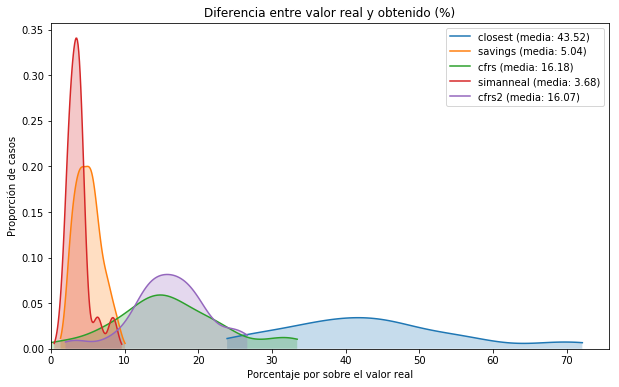

In [51]:
for e, out_times in output_timess.items():
    diferences = get_diferences(out_times)
#     plt.hist(diferences, alpha=0.5, label=e)
    label = '{} (media: {:.2f})'.format(e, np.mean(diferences))
    sns.kdeplot(diferences, label=label, shade=True, bw=.4)
    plt.title('Diferencia entre valor real y obtenido (%)')
    
plt.legend()
plt.ylabel('Proporción de casos')
plt.xlabel('Porcentaje por sobre el valor real')
plt.xlim(xmin=0)

plt.savefig(path('images', 'hist-all.eps'.format(executable)), )